In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [207]:
df_PM10 = pd.read_csv('Merged_PM10_data.csv')
df_PM10

,stationID,datetime,pm10,o3,co,no2,so2,ws,wd,temp,rh,bp,rain,Traffic congestion index
0,02t,2023-12-01 00:00,NaN,NaN,NaN,NaN,NaN,0.7,49.0,30.0,53.0,754.0,0.0,2.4
1,02t,2023-12-01 01:00,NaN,NaN,NaN,NaN,NaN,0.8,51.0,29.5,55.0,753.0,0.0,2.1
2,02t,2023-12-01 02:00,NaN,NaN,NaN,NaN,NaN,0.4,5.0,29.1,57.0,753.0,0.0,2.5
3,02t,2023-12-01 03:00,NaN,NaN,NaN,NaN,NaN,0.4,30.0,28.5,60.0,753.0,0.0,2.3
4,02t,2023-12-01 04:00,NaN,NaN,NaN,NaN,NaN,0.7,19.0,28.1,62.0,753.0,0.0,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68986,93t,2024-01-02 20:00,19.0,25.0,0.05,1.0,NaN,3.5,63.0,28.9,80.0,754.0,0.0,2.9
68987,93t,2024-01-02 21:00,26.0,22.0,0.05,1.0,NaN,3.1,51.0,28.4,81.0,755.0,0.0,3.3
68988,93t,2024-01-02 22:00,22.0,21.0,0.05,1.0,NaN,2.8,43.0,28.1,81.0,755.0,0.0,2.5
68989,93t,2024-01-02 23:00,20.0,20.0,0.05,1.0,NaN,3.6,37.0,27.9,82.0,755.0,0.0,1.7


In [208]:
df_PM10.shape

(68991, 14)

In [209]:
df_PM10.describe()

,pm10,o3,co,no2,so2,ws,wd,temp,rh,bp,rain,Traffic congestion index
count,33960.000000,29061.000000,24087.000000,23503.000000,13973.000000,68198.000000,68198.000000,68198.000000,68198.000000,68198.000000,68198.000000,68034.000000
mean,48.585748,26.262001,0.605629,10.074076,1.697202,3.344817,117.224068,22.481533,47.387709,501.230549,0.052739,3.503325
std,26.315019,17.484793,0.514690,10.534180,1.860391,16.415977,119.599797,11.438437,34.096886,424.938912,2.795281,1.244563
min,4.000000,1.000000,0.010000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000
25%,30.000000,12.000000,0.330000,3.000000,1.000000,0.100000,10.000000,20.500000,0.000000,0.000000,0.000000,2.400000
50%,43.000000,24.000000,0.480000,7.000000,1.000000,0.500000,73.000000,25.600000,54.000000,746.000000,0.000000,3.400000
75%,61.000000,38.000000,0.690000,13.000000,2.000000,1.400000,211.000000,29.400000,75.000000,756.000000,0.000000,4.500000
max,482.000000,144.000000,9.870000,97.000000,89.000000,172.100000,360.000000,62.900000,111.000000,63284.000000,703.800000,7.000000


In [210]:
df_PM10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68991 entries, 0 to 68990
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   stationID                 68991 non-null  object 
 1   datetime                  68991 non-null  object 
 2   pm10                      33960 non-null  float64
 3   o3                        29061 non-null  float64
 4   co                        24087 non-null  float64
 5   no2                       23503 non-null  float64
 6   so2                       13973 non-null  float64
 7   ws                        68198 non-null  float64
 8   wd                        68198 non-null  float64
 9   temp                      68198 non-null  float64
 10  rh                        68198 non-null  float64
 11  bp                        68198 non-null  float64
 12  rain                      68198 non-null  float64
 13  Traffic congestion index  68034 non-null  float64
dtypes: flo

### **Heatmap**

<ipython-input-211-788a289dee79>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_PM10.corr(), annot=True, cmap='coolwarm', fmt=".2f")


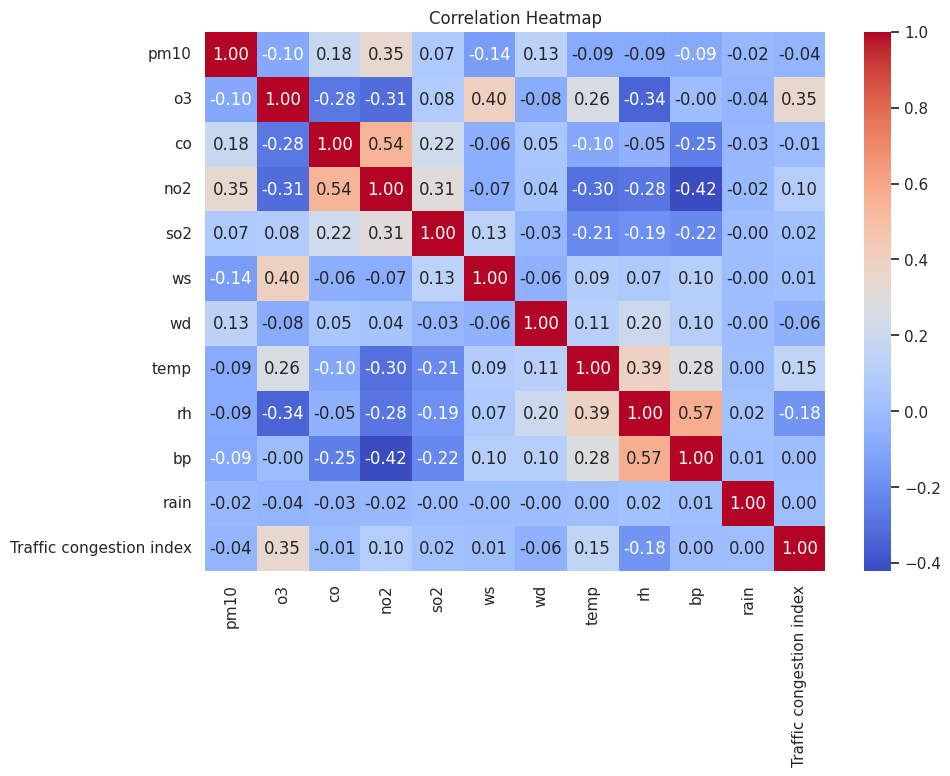

In [211]:
# สร้าง heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(df_PM10.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### **Min Max Pm10**

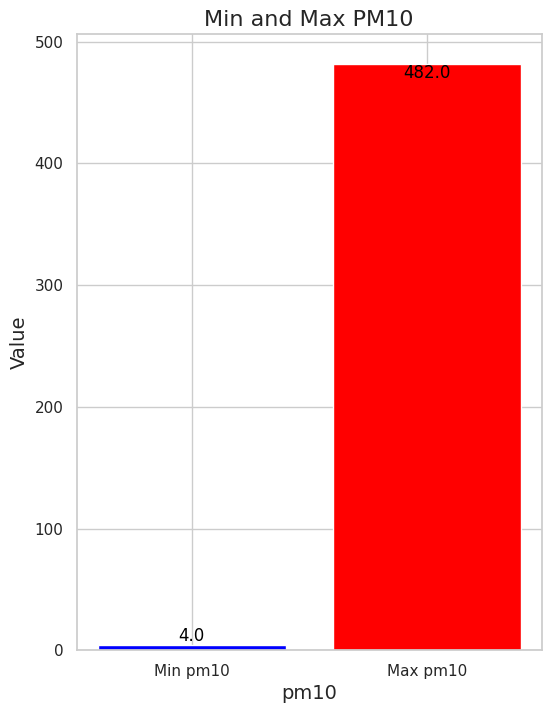

In [212]:
max_pm10 = df_PM10['pm10'].max()
min_pm10 = df_PM10['pm10'].min()

plt.figure(figsize=(6, 8))  # ปรับขนาดกราฟเป็นแนวตั้ง

bar_values = [min_pm10, max_pm10]
bar_labels = ['Min pm10', 'Max pm10']
bar_colors = ['blue', 'red']

bars = plt.bar(bar_labels, bar_values, color=bar_colors)  # ใช้ plt.bar() แทน plt.barh()

for bar, value in zip(bars, bar_values):
    plt.text(bar.get_x() + bar.get_width()/2, value, f'{value}', ha='center', va='bottom' if value == min_pm10 else 'top',
             color='black', fontsize=12)

plt.ylabel('Value', fontsize=14)  # เปลี่ยนแกนของแนวตั้งเป็น 'Value'
plt.xlabel('pm10', fontsize=14)  # เปลี่ยนแกนของแนวนอนเป็น 'pm10'
plt.title('Min and Max PM10', fontsize=16)

plt.show()

### **duplicated**

In [213]:
df_PM10.drop_duplicates(keep=False, inplace=True)
print('duplicated: %s'%(df_PM10.duplicated(keep=False).sum()))

duplicated: 0


In [214]:
df_PM10

,stationID,datetime,pm10,o3,co,no2,so2,ws,wd,temp,rh,bp,rain,Traffic congestion index
0,02t,2023-12-01 00:00,NaN,NaN,NaN,NaN,NaN,0.7,49.0,30.0,53.0,754.0,0.0,2.4
1,02t,2023-12-01 01:00,NaN,NaN,NaN,NaN,NaN,0.8,51.0,29.5,55.0,753.0,0.0,2.1
2,02t,2023-12-01 02:00,NaN,NaN,NaN,NaN,NaN,0.4,5.0,29.1,57.0,753.0,0.0,2.5
3,02t,2023-12-01 03:00,NaN,NaN,NaN,NaN,NaN,0.4,30.0,28.5,60.0,753.0,0.0,2.3
4,02t,2023-12-01 04:00,NaN,NaN,NaN,NaN,NaN,0.7,19.0,28.1,62.0,753.0,0.0,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68986,93t,2024-01-02 20:00,19.0,25.0,0.05,1.0,NaN,3.5,63.0,28.9,80.0,754.0,0.0,2.9
68987,93t,2024-01-02 21:00,26.0,22.0,0.05,1.0,NaN,3.1,51.0,28.4,81.0,755.0,0.0,3.3
68988,93t,2024-01-02 22:00,22.0,21.0,0.05,1.0,NaN,2.8,43.0,28.1,81.0,755.0,0.0,2.5
68989,93t,2024-01-02 23:00,20.0,20.0,0.05,1.0,NaN,3.6,37.0,27.9,82.0,755.0,0.0,1.7


### **Missing Value**

In [215]:
df_PM10.isnull().sum()

stationID                       0
datetime                        0
pm10                        35015
o3                          39856
co                          44830
no2                         45352
so2                         53996
ws                            793
wd                            793
temp                          793
rh                            793
bp                            793
rain                          793
Traffic congestion index      935
dtype: int64

In [216]:
df_PM10

,stationID,datetime,pm10,o3,co,no2,so2,ws,wd,temp,rh,bp,rain,Traffic congestion index
0,02t,2023-12-01 00:00,NaN,NaN,NaN,NaN,NaN,0.7,49.0,30.0,53.0,754.0,0.0,2.4
1,02t,2023-12-01 01:00,NaN,NaN,NaN,NaN,NaN,0.8,51.0,29.5,55.0,753.0,0.0,2.1
2,02t,2023-12-01 02:00,NaN,NaN,NaN,NaN,NaN,0.4,5.0,29.1,57.0,753.0,0.0,2.5
3,02t,2023-12-01 03:00,NaN,NaN,NaN,NaN,NaN,0.4,30.0,28.5,60.0,753.0,0.0,2.3
4,02t,2023-12-01 04:00,NaN,NaN,NaN,NaN,NaN,0.7,19.0,28.1,62.0,753.0,0.0,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68986,93t,2024-01-02 20:00,19.0,25.0,0.05,1.0,NaN,3.5,63.0,28.9,80.0,754.0,0.0,2.9
68987,93t,2024-01-02 21:00,26.0,22.0,0.05,1.0,NaN,3.1,51.0,28.4,81.0,755.0,0.0,3.3
68988,93t,2024-01-02 22:00,22.0,21.0,0.05,1.0,NaN,2.8,43.0,28.1,81.0,755.0,0.0,2.5
68989,93t,2024-01-02 23:00,20.0,20.0,0.05,1.0,NaN,3.6,37.0,27.9,82.0,755.0,0.0,1.7


In [217]:
stations = df_PM10['stationID'].unique()
print(stations)

['02t' '05t' '10t' '11t' '12t' '59t' '61t' '03t' '50t' '52t' '53t' '54t'
 '08t' '16t' '17t' '18t' '19t' '13t' '22t' '14t' '27t' '20t' '81t' '21t'
 '24t' '25t' '26t' '79t' '84t' '85t' '99t' '46t' '47t' '72t' '82t' '83t'
 '88t' '90t' '91t' '101t' '102t' '28t' '29t' '30t' '31t' '74t' '32t' '33t'
 '34t' '60t' '71t' '77t' '87t' '35t' '36t' '37t' '38t' '39t' '40t' '41t'
 '57t' '73t' '58t' '67t' '75t' '68t' '69t' '70t' '76t' '86t' '92t' '94t'
 '95t' '96t' '97t' '98t' '42t' '43t' '44t' '62t' '63t' '78t' '80t' '89t'
 '93t']


In [218]:
df_PM10['pm10'].fillna(df_PM10.groupby('ws')['pm10'].transform('mean'), inplace=True)
df_PM10['pm10'].fillna(df_PM10['pm10'].mean(), inplace=True)

In [219]:
df_PM10['o3'].fillna(df_PM10.groupby('rh')['o3'].transform('mean'), inplace=True)
df_PM10['o3'].fillna(df_PM10['o3'].mean(), inplace=True)

In [220]:
df_PM10['co'].fillna(df_PM10.groupby('o3')['co'].transform('mean'), inplace=True)
df_PM10['co'].fillna(df_PM10['co'].mean(), inplace=True)

In [221]:
df_PM10['no2'].fillna(df_PM10.groupby('o3')['no2'].transform('mean'), inplace=True)
df_PM10['no2'].fillna(df_PM10['no2'].mean(), inplace=True)

In [222]:
df_PM10['so2'].fillna(df_PM10.groupby('bp')['so2'].transform('mean'), inplace=True)
df_PM10['so2'].fillna(df_PM10['so2'].mean(), inplace=True)

In [223]:
df_PM10['ws'].fillna(df_PM10.groupby('o3')['ws'].transform('mean'), inplace=True)
df_PM10['ws'].fillna(df_PM10['ws'].mean(), inplace=True)

In [224]:
df_PM10['wd'].fillna(df_PM10.groupby('rh')['wd'].transform('mean'), inplace=True)
df_PM10['wd'].fillna(df_PM10['wd'].mean(), inplace=True)

In [225]:
df_PM10['temp'].fillna(df_PM10.groupby('rh')['temp'].transform('mean'), inplace=True)
df_PM10['temp'].fillna(df_PM10['temp'].mean(), inplace=True)

In [226]:
df_PM10['rh'].fillna(df_PM10.groupby('o3')['rh'].transform('mean'), inplace=True)
df_PM10['rh'].fillna(df_PM10['rh'].mean(), inplace=True)

In [227]:
df_PM10['bp'].fillna(df_PM10.groupby('no2')['bp'].transform('mean'), inplace=True)
df_PM10['bp'].fillna(df_PM10['bp'].mean(), inplace=True)

In [228]:
df_PM10['rain'].fillna(df_PM10.groupby('o3')['rain'].transform('mean'), inplace=True)
df_PM10['rain'].fillna(df_PM10['rain'].mean(), inplace=True)

In [229]:
df_PM10['Traffic congestion index'].fillna(df_PM10.groupby('o3')['Traffic congestion index'].transform('mean'), inplace=True)
df_PM10['Traffic congestion index'].fillna(df_PM10['Traffic congestion index'].mean(), inplace=True)

In [230]:
df_PM10

,stationID,datetime,pm10,o3,co,no2,so2,ws,wd,temp,rh,bp,rain,Traffic congestion index
0,02t,2023-12-01 00:00,54.039377,35.386308,1.285417,5.470588,1.689453,0.7,49.0,30.0,53.0,754.0,0.0,2.4
1,02t,2023-12-01 01:00,56.639373,33.148402,1.199468,11.740741,1.488889,0.8,51.0,29.5,55.0,753.0,0.0,2.1
2,02t,2023-12-01 02:00,56.536504,31.055118,1.121856,16.146341,1.488889,0.4,5.0,29.1,57.0,753.0,0.0,2.5
3,02t,2023-12-01 03:00,56.536504,28.648649,1.266667,8.291667,1.488889,0.4,30.0,28.5,60.0,753.0,0.0,2.3
4,02t,2023-12-01 04:00,54.039377,28.158986,1.415610,22.500000,1.488889,0.7,19.0,28.1,62.0,753.0,0.0,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68986,93t,2024-01-02 20:00,19.000000,25.000000,0.050000,1.000000,1.689453,3.5,63.0,28.9,80.0,754.0,0.0,2.9
68987,93t,2024-01-02 21:00,26.000000,22.000000,0.050000,1.000000,2.149923,3.1,51.0,28.4,81.0,755.0,0.0,3.3
68988,93t,2024-01-02 22:00,22.000000,21.000000,0.050000,1.000000,2.149923,2.8,43.0,28.1,81.0,755.0,0.0,2.5
68989,93t,2024-01-02 23:00,20.000000,20.000000,0.050000,1.000000,2.149923,3.6,37.0,27.9,82.0,755.0,0.0,1.7


In [231]:
df_PM10.isnull().sum()

stationID                   0
datetime                    0
pm10                        0
o3                          0
co                          0
no2                         0
so2                         0
ws                          0
wd                          0
temp                        0
rh                          0
bp                          0
rain                        0
Traffic congestion index    0
dtype: int64

### **Outlier**

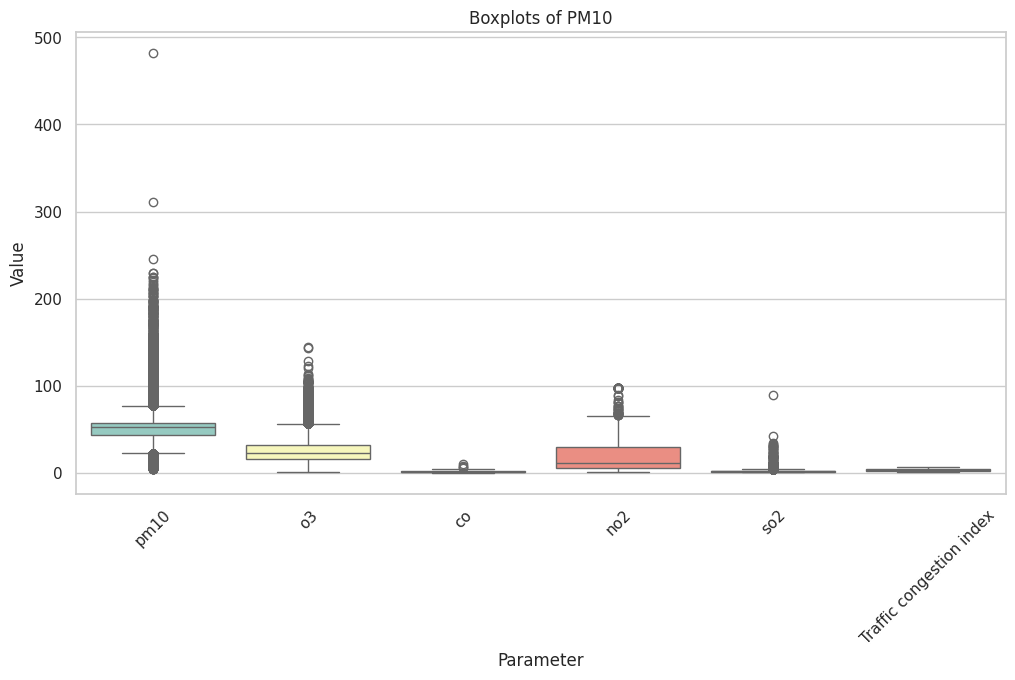

In [232]:
sns.set(style="whitegrid")

# Define the columns you want to create boxplots for
columns_to_plot = ['pm10', 'o3', 'co', 'no2', 'so2','Traffic congestion index']

# Create boxplots using Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_PM10[columns_to_plot], orient="v", palette="Set3")
plt.title('Boxplots of PM10')
plt.ylabel('Value')
plt.xlabel('Parameter')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [234]:
df_PM10.to_csv('PM10_data_with_prep.csv', index=False)